<a href="https://colab.research.google.com/github/GenAIUnplugged/machine-learning/blob/main/load_digits_dataset_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
X,y = load_digits(return_X_y=True)

In [3]:
X.shape,y.shape

((1797, 64), (1797,))

In [4]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [19]:
def get_metrics(x_train,y_train,x_test,y_test,model_name,model,params):
    print(f"Model Name: {model_name}")
    model=model
    model.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    print("*"*50)
    print(f"Testing Score: {model.score(x_test,y_test)}")
    print(f"Training Score: {model.score(x_train,y_train)}")
    print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print("*"*50)
    gridsearch = GridSearchCV(estimator=model,param_grid=params,cv=5)
    gridsearch.fit(x_train,y_train)
    print("GridSearchCV Results")
    print(f"Best Parameters: {gridsearch.best_params_}")
    print(f"Best Score: {gridsearch.best_score_}")
    print("*"*50)
    randomizedsearch = RandomizedSearchCV(estimator=model,param_distributions=params,cv=5)
    randomizedsearch.fit(x_train,y_train)
    print("RandomizedSearchCV Results")
    print(f"Best Parameters: {randomizedsearch.best_params_}")
    print(f"Best Score: {randomizedsearch.best_score_}")
    print("*"*50)


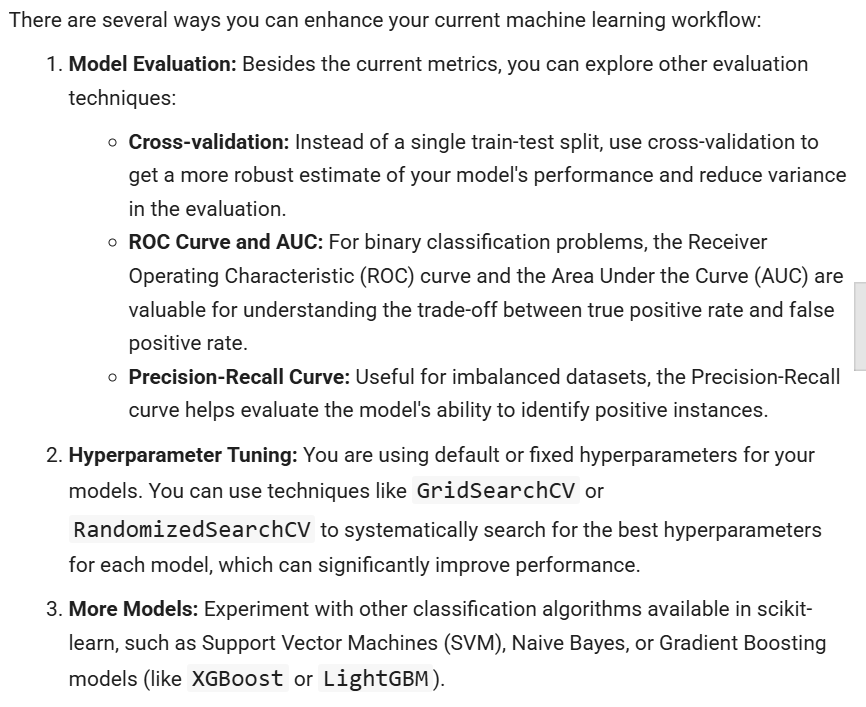

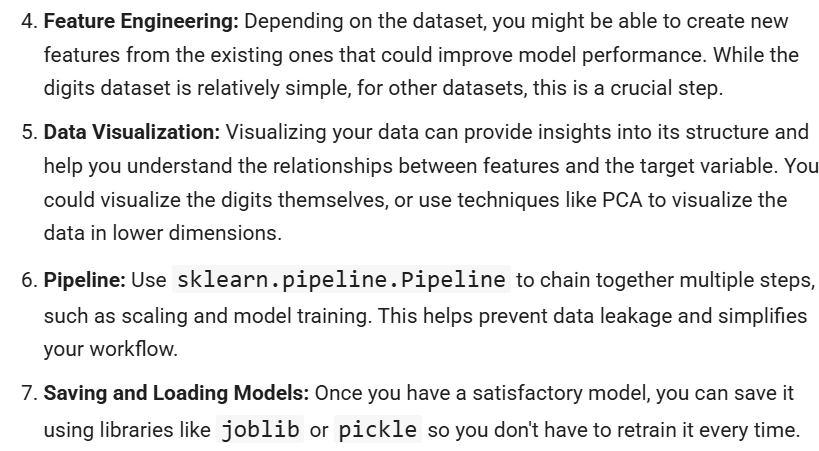

In [21]:
rf = RandomForestClassifier(n_estimators=1000,random_state=42)
param_grid = {
    'n_estimators': [100,200,300,400],
    'max_depth': [10,20,30,40],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}
get_metrics(x_train,y_train,x_test,y_test,"Random Forest",rf,params=param_grid)

Model Name: Random Forest
**************************************************
Testing Score: 0.9777777777777777
Training Score: 1.0
Accuracy Score: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 3

In [22]:
dtc = DecisionTreeClassifier()
param_grid = {
    'max_depth': [10,20,30,40],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}
get_metrics(x_train,y_train,x_test,y_test,"Decision Tree",dtc,params=param_grid)

Model Name: Decision Tree
**************************************************
Testing Score: 0.8472222222222222
Training Score: 1.0
Accuracy Score: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 3

In [24]:
knc = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}
get_metrics(x_train,y_train,x_test,y_test,"KNN",knc,params=param_grid)

Model Name: KNN
**************************************************
Testing Score: 0.9861111111111112
Training Score: 0.9895615866388309
Accuracy Score: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0

In [25]:
lr = LogisticRegression()
# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
get_metrics(x_train_scaled,y_train,x_test_scaled,y_test,"Logistic Regression",lr,params=param_grid)

Model Name: Logistic Regression
**************************************************
Testing Score: 0.9722222222222222
Training Score: 0.9986082115518441
Accuracy Score: 0.35
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.33      0.68      0.45        28
           2       0.50      0.03      0.06        33
           3       0.52      0.38      0.44        34
           4       0.55      0.13      0.21        46
           5       0.30      0.91      0.45        47
           6       0.00      0.00      0.00        35
           7       0.28      0.85      0.43        34
           8       0.00      0.00      0.00        30
           9       0.79      0.38      0.51        40

    accuracy                           0.35       360
   macro avg       0.33      0.34      0.25       360
weighted avg       0.34      0.35      0.26       360

[[ 0  0  0  0  5 15  0 11  0  2]
 [ 0 19  0  3  0  4  0  1  0  1]
 [

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/l

KeyboardInterrupt: 